In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats

%matplotlib inline


In [ ]:
# 21번: cdf 35이상일 확률

In [2]:
df = pd.DataFrame({"A": [25, 30, 20, 23, 27, 33, 23, 20, 25, 24],
                  "B": [31, 30, 34, 30, 28, 31, 30, 31, 32, 30],
                  "C": [19, 21, 27, 25, 25, 30, 26, 29, 30, 24],
                  "D": [18, 25, 16, 19, 20, 20, 25, 22, 23, 17]})

In [42]:
mu = np.mean(df)
sigma = np.std(df)

x1 = 35

prob1 = stats.norm.cdf(x1, mu, sigma)
print("35분 이상 소요될 학률: {:.3f}%".format((1-prob)*100))

35분 이상 소요될 학률: 22.622%


In [4]:
# 22번: 카이제곱 검정
df = pd.DataFrame({"저": [182, 154], 
                 "중": [213, 138],
                 "고": [203, 110]},
                 index=["찬성", "반대"])

In [7]:
df.head()
from scipy.stats import chi2_contingency
chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi-square test")
print("chi-square: {0:0.2f}".format(chi))
print("p-value:  {:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n {}".format(expected.round(1)))


chi-square test
chi-square: 7.88
p-value:  0.019
degree of freedom: 2
expected value: 
 [[200.9 209.9 187.2]
 [135.1 141.1 125.8]]


# 23번 
- 불량률 5% 무작위 5개 중 불량품 없을 경우, 2개 이상일 확률

In [15]:
mu = 0.05
prob = stats.binom.pmf(k=0, n=5, p=0.05)
prob2 = stats.binom.cdf(k=1, n=5, p=0.05)

print("P(X={0}) = {1:.3f}".format(0, prob))
print("P(X>={0}) = {1:.3f}".format(2, 1-prob2))

P(X=0) = 0.774
P(X>=2) = 0.023


# 24번
- 가설 검정, F통계량 값, 검정결과

In [32]:
df = pd.DataFrame({"before": [30, 13, 8, 17, 28, 26, 16, 45, 21, 5],
                  "after": [20, 7, 25, 4, 31, 9, 15, 25, 1, 10]})

In [43]:
formula = "after ~ before"
reg_model =smf.ols(formula, df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  after   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.469
Date:                Mon, 01 Mar 2021   Prob (F-statistic):              0.260
Time:                        10:09:28   Log-Likelihood:                -35.967
No. Observations:                  10   AIC:                             75.93
Df Residuals:                       8   BIC:                             76.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6604      6.593      1.162      0.2

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 25번
- 선형회귀모형

In [22]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 가설검정 및 통계 분석 패키지
from scipy import stats

# 선형모델 formula ( y ~ x1 + x2 + ...)
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.proportion import proportions_ztest
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [26]:

df = pd.DataFrame({"X" : [-3, -2, -1, 0, 1, 2, 3],
                 "Y": [0.4, 1.3, 2.2, 2.5, 2.4, 2.0, 1.5]})

In [27]:
formula = "Y ~ X"
reg_model =smf.ols(formula, df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     1.729
Date:                Mon, 01 Mar 2021   Prob (F-statistic):              0.246
Time:                        09:58:23   Log-Likelihood:                -6.3003
No. Observations:                   7   AIC:                             16.60
Df Residuals:                       5   BIC:                             16.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7571      0.266      6.602      0.0

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


(nan, nan)

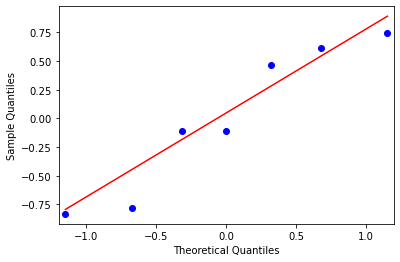

In [31]:
qqplot(reg_result.resid, line="q")

from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

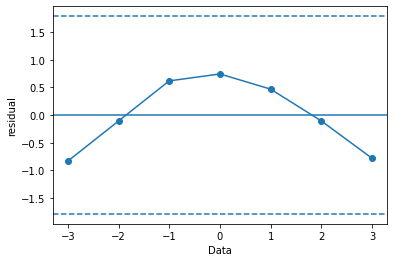

In [30]:
# 잔차의 독립성
plt.plot(df["X"], reg_result.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("residual")

plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")